# British Columbia 2020 Covid-19 Data Analysis

In [150]:
from collections import namedtuple
from typing import List
import csv
import matplotlib.pyplot as plt


# Data Definition

#AgeGroup 
# 0: <10 
# 1: 10-19
# 2: 20-29
# 3: 30-39
# 4: 40-49
# 5: 50-59
# 6: 60-69
# 7: 70-79
# 8: 80-89
# 9: >=90


CovidData = namedtuple('CovidData',['region',
                                    'sex',
                                    'age_group'])

In [151]:
def read(filename: str) -> List[CovidData]:

    lorc = []

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            cd = CovidData(row[1],row[2],assignAgeGroup(row[3]))
            lorc.append(cd)
    
    return lorc

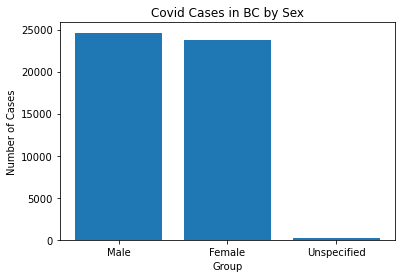

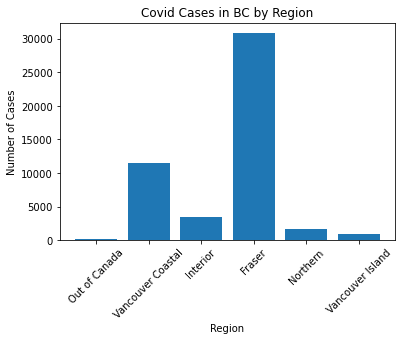

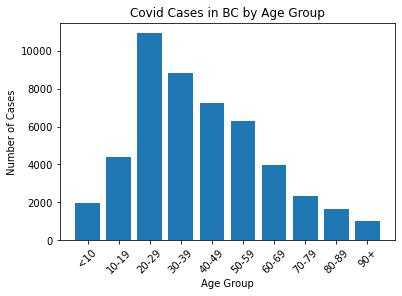

In [152]:
data = read('/Users/sol.lee/BC_Covid/bc_covid_case_details.csv')

def assignAgeGroup(age_group: str) -> int: 
    switcher = {
        '<10': 0,
        '10-19': 1,
        '20-29': 2,
        '30-39': 3,
        '40-49': 4,
        '50-59': 5,
        '60-69': 6,
        '70-79': 7,
        '80-89': 8,
        '90+': 9
    }
    return switcher.get(age_group)

    
def countBySex(locd: List[CovidData]) -> List[int]:
    females = 0
    males = 0
    unspecified = 0
    
    for cd in locd: 
        if (cd.sex == 'M'):
            males += 1
        elif (cd.sex == 'F'):
            females += 1
        else:
            unspecified += 1
    return [males,females,unspecified]


def plotCasesBySexBarGraph(locd: List[CovidData]) -> None: 
    bar_width = 0.30
    
    opacity = 0.4
    
    countBySexGroup = countBySex(locd)

    # set the labels for the x-axis, y-axis, and plot title
    plt.xlabel('Group')
    plt.ylabel('Number of Cases')
    plt.title('Covid Cases in BC by Sex')
    
    plt.bar(['Male','Female','Unspecified'],countBySexGroup)
    plt.show()
    return


def countCaseByRegion(locd: List[CovidData]) -> List[str]:
    OutOfCanada = 0
    VancouverCoastal = 0
    Interior = 0
    Fraser = 0
    Northern = 0
    VancouverIsland = 0
    for cd in locd: 
        region = cd.region
        if (region == "Out of Canada"):
            OutOfCanada += 1
        elif (region == "Vancouver Coastal"):
            VancouverCoastal += 1
        elif (region == "Interior"):
            Interior += 1
        elif (region == "Fraser"):
            Fraser += 1
        elif (region == "Northern"):
            Northern += 1
        else: 
            VancouverIsland += 1
    return [OutOfCanada, VancouverCoastal, Interior, Fraser, Northern, VancouverIsland]


def plotCasesbyRegionBarGraph(locd: List[CovidData]) -> None: 
    countByRegion = countCaseByRegion(locd)

    plt.xlabel('Region')
    plt.ylabel('Number of Cases')
    plt.title('Covid Cases in BC by Region')

    x_label = ["Out of Canada", "Vancouver Coastal", "Interior", 
               "Fraser", "Northern", "Vancouver Island"]
    plt.bar(x_label,countByRegion)
    plt.xticks(rotation=45)
    plt.show()
    return


def countCaseByAgeGroup(locd: List[CovidData]) -> None: 
    below10 = 0
    ten_19 = 0
    twenty_29 = 0
    thirty_39 = 0
    fourty_49 = 0
    fifty_59 = 0
    sixty_69 = 0
    seventy_79 = 0
    eighty_89 = 0
    aboveNinety = 0
    
    for cd in locd: 
        ageGroup = cd.age_group
        if (ageGroup == 0):
            below10 += 1
        elif (ageGroup == 1):
            ten_19 += 1
        elif (ageGroup == 2):
            twenty_29 += 1
        elif (ageGroup == 3):
            thirty_39 += 1
        elif (ageGroup == 4):
            fourty_49 += 1
        elif (ageGroup == 5):
            fifty_59 += 1
        elif (ageGroup == 6):
            sixty_69 += 1
        elif (ageGroup == 7):
            seventy_79 += 1
        elif (ageGroup == 8):
            eighty_89 += 1
        else:
            aboveNinety += 1

    return [below10, ten_19, twenty_29, thirty_39, fourty_49, 
            fifty_59, sixty_69, seventy_79, eighty_89, aboveNinety]


def plotCasesbyAgeGroup(locd: List[CovidData]) -> None: 
    casesByAgeGroup = countCaseByAgeGroup(locd)

    # set the labels for the x-axis, y-axis, and plot title
    plt.xlabel('Age Group')
    plt.ylabel('Number of Cases')
    plt.title('Covid Cases in BC by Age Group')

    x_label  = ['<10','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+']

    plt.bar(x_label,casesByAgeGroup)
    plt.xticks(rotation=45)
    plt.show()
    return

    
plotSexBarGraph(data)
plotCasesbyRegionBarGraph(data)
plotCasesbyAgeGroup(data)